# Atividade Prática 10

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm
import escalonamento as esc

*Define os locais de armazenamento dos dados:*

In [40]:
#Dicionários para o armazenamento dos dados:
tempo_sup={}
type(tempo_sup)

tempo_inf={}
type(tempo_inf)

dic_mat_sup={}
type(dic_mat_sup)

dic_mat_inf={}
type(dic_mat_sup)

dic_vet={}
type(dic_vet)

#Auxiliares das chaves dos dicionários:
sup=int(0)
inf=int(0)
vet=int(0)
tsup=int(0)
tinf=int(0)

#Número de Iterações:
it_s=int(0)#Superior
it_i=int(0)#Inferior

*Define as funções para a resolução matrizes triangulares superiores e inferiores quadradas de ordem 'm'*

In [41]:
def solve_triangular_superior(U, b):
    contador=int(0)
    
    # Ordem das matrizes
    n = U.shape[0]  
    
    # Cópias usuais para evitar problemas
    x = b.copy().reshape(n)

    # Vai linha-a-linha, de baixo para cima, escalonando a matriz utilizando o pivô na diagonal   
    for i in range(n-1,-1,-1):
        # Normaliza a i-ésima linha
        x[i] /= U[i,i]    
        contador+=1 

        for j in range(i-1,-1,-1):
            # Pivoteia a i-ésima coluna, utilizando a entrada diagonal como pivô
            x[j] -= U[j,i]*x[i]     

            contador+=2 #Duas operações - e *

    return x, contador

def solve_triangular_inferior(L, b):
    contador=int(0)
    
    # Ordem das matrizes
    n = L.shape[0]          
    
    # Cópias usuais para evitar problemas
    x = b.copy().reshape(n)

    # Vai linha-a-linha, de cima para baixo, escalonando a matriz utilizando o pivô na diagonal
                        
    for i in range(n):
        # Normaliza a i-ésima linha
        x[i] /= L[i,i]    
        contador+=1 

        for j in range(i+1,n):
            # Pivoteia a i-ésima coluna, utilizando a entrada diagonal como pivô
            x[j] -= L[j,i]*x[i]    

            contador+=2

    return x, contador

*Gera as matrizes quadradas de ordem 2 até 'm', com valores entre 10 e -10, faz a triangulação, guarda-as em seus respectivos dicionários, de mesmo modo o faz com um vetor de ordem 2 até 'm'*

In [42]:
m=12
for i in range (2,m):

    ''' MATRIZ TRIANGULAR SUPERIOR '''
    #Cria as variáveis aleatórias de teste para triangulação superior
    A = 20*np.random.rand(i,i)-10
    U=A.copy()
    for k in range(i):
        for j in range(k):
            U[k,j]=0.0       


    dic_mat_sup[sup]=U
    sup+=1

    #Finaliza a criação das variáveis de teste para triangulação superior


    ''' MATRIZ TRIANGULAR INFERIOR'''
    #Cria as variáveis aleatórias de teste para triangulação inferior
    L=A.copy()
    for k in range(i):
        for j in range(k):
            L[j,k]=0.0       
    dic_vet[vet] = 20*np.random.rand(i)-10
    vet+=1

    dic_mat_inf[inf]=L
    inf+=1
    #Finaliza a criação das variáveis de teste para triangulação inferior

*Mostra as matrizes e vetores gerados:*

In [43]:
print("Os vetores são:\n",dic_vet)
print("\n#######################################################\n")
print("As matrizes triangulares superiores são:\n",dic_mat_sup)
print("\n#######################################################\n")
print("As matrizes triangulares inferiores são:\n",dic_mat_inf)

Os vetores são:
 {0: array([ 2.71491704, -7.68308663]), 1: array([-4.23460021,  6.04800673,  3.47297637]), 2: array([0.2731125 , 1.99532279, 8.3246106 , 3.23895415]), 3: array([ 9.65055269, -7.7730668 , -3.28274673,  2.17599368,  4.78332604]), 4: array([-7.14847811,  1.99430192, -0.77815187, -7.68811151, -9.1068827 ,
        9.12806198]), 5: array([ 6.02512934,  0.32569279,  7.82545502, -6.6868313 , -4.96268033,
       -0.15474997,  1.77952937]), 6: array([-1.94719956,  2.69380145,  9.56799195, -2.00551106, -2.27355595,
        8.59104109, -3.06607452,  0.37941346]), 7: array([-0.06646719,  7.92607403,  1.69009649,  4.25211859, -3.57163611,
        7.29629742, -7.32009493, -9.13877822, -0.96447856]), 8: array([-8.73640478, -9.36550957,  2.0777841 , -0.22534438, -8.99310594,
        7.59579927, -9.28946594,  3.20680056, -0.44799633,  0.55616309]), 9: array([-6.94029895, -4.17131872,  4.37154837, -8.66546692, -9.90769115,
        2.6207151 , -3.12616226,  2.01602452,  4.50176192, -7.6131

*Realiza os testes de tempo de execução da função, armazena-os em um dicionário*

In [44]:
#Número de componentes do dicionário
n=(m-2)

#Numéro de repetições para medição do tempo
z=10
#Testes n  da função:
for aux in tqdm(range (n)):

    inicio=time()
    #Teste Matriz superior:
    for i in range(z):
        a,b = solve_triangular_superior(dic_mat_sup[aux],dic_vet[aux]) # Solução pretendida do sistema Ux = b
        if i==(z-1):it_s+=b
    
    fim=time()
    tempo_sup[tsup]=((fim-inicio)/z)
    tsup+=1
    inicio=0
    fim=0

    inicio=time()
    #Teste Matriz inferior:
    for  j in range(z):
        c,d = solve_triangular_inferior(dic_mat_inf[aux],dic_vet[aux]) # Solução pretendida do sistema Ux = b
        if j==(z-1):it_i+=d
    
    fim=time()
    tempo_inf[tinf]=((fim-inicio)/z)
    tinf+=1
    inicio=0
    fim=0

100%|██████████| 10/10 [00:00<00:00, 635.10it/s]


*Mostra o número de iterações que deve ser igual ao somatório de 2² até (m-2)²*

In [45]:
print("\nO número de iterações total para matriz superior é: ",it_s)
print("\nO número de iterações total para matriz inferior é: ",it_i)


O número de iterações total para matriz superior é:  505

O número de iterações total para matriz inferior é:  505


*Mostra os dicionários de tempo e seus respectivos valores:*

In [46]:
print("Os tempos das matrizes superiores são:\n",tempo_sup)
print("\nOs tempos das matrizes inferiores são:\n",tempo_inf)

Os tempos das matrizes superiores são:
 {0: 2.1052360534667968e-05, 1: 2.3627281188964842e-05, 2: 3.628730773925781e-05, 3: 4.2510032653808596e-05, 4: 5.1522254943847655e-05, 5: 6.639957427978516e-05, 6: 8.683204650878906e-05, 7: 0.00010609626770019531, 8: 0.00014498233795166016, 9: 0.000150299072265625}

Os tempos das matrizes inferiores são:
 {0: 1.5401840209960936e-05, 1: 2.4509429931640624e-05, 2: 2.9826164245605467e-05, 3: 3.888607025146484e-05, 4: 7.023811340332032e-05, 5: 6.73055648803711e-05, 6: 9.164810180664062e-05, 7: 0.00012285709381103515, 8: 0.0001385211944580078, 9: 0.00016067028045654296}


*Define a função responsável por plotar os gráficos:*

In [47]:
def graf_pontos(dic):
    plt.plot(dic.keys(),dic.values(),'ro')
    plt.xlabel("Ordem da Matriz")
    plt.ylabel("Tempo de execução")
    plt.title("Gráfico Tempo de Execução para Resolução de Matriz Superior")
    plt.show()

*Cria a função que que faz a regressão do tempo de execução das funções:*

Obs.: Como a complexidade do algoritmo de cada função é quadrada a função de regressão deve se aproximar de uma função quadrada

In [48]:
def regressao(dic):
    #Converte o dicionário em vetores
    x = np.array(list(dic.keys()))
    y = np.array(list(dic.values()))

    # Ajuste de uma curva quadrática (ax^2 + bx + c) aos pontos
    A = np.vstack([x**2, x, np.ones(len(x))]).T
    a, b, c = np.linalg.lstsq(A, y, rcond=None)[0]

    return a, b, c

def f_quadrada(a,b,c,x): return ((a*(x**2))+(b*x)+c)

def grafico(dic):
    a, b, c = regressao(dic)

    # Plotar a função de regressão quadrática
    x = np.linspace(min(dic.keys()), max(dic.keys()), 100)
    y = f_quadrada(a, b, c, x)

    # Plotar os pontos do dicionário
    plt.scatter(list(dic.keys()), list(dic.values()), label='Pontos')

    # Plotar a função de regressão quadrática
    plt.plot(x, y, color='green' ,label='Regressão Quadrática')

    plt.xlabel('Ordem da Matriz')
    plt.ylabel('Tempo de execução')
    plt.title('Regressão Quadrática')
    plt.legend()
    plt.show()

*Plota o gráfico com os tempos médios da função que resolve matrizes triangulares superiores:*

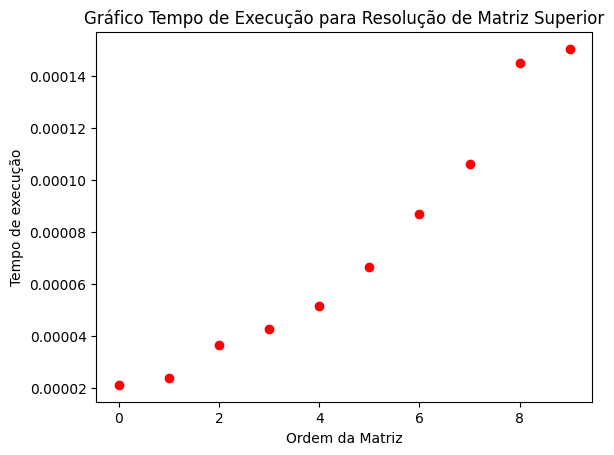

In [49]:
graf_pontos(tempo_sup)

*Plota o gráfico da regressão que melhor aproxima o tempo de execução da função que resolve matriz triangular superior:*

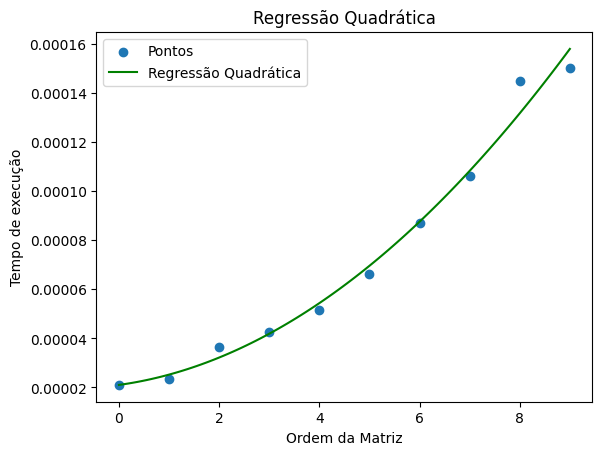

In [50]:
grafico(tempo_sup)

*Plota o gráfico com os tempos médios da função que resolve matrizes triangulares inferiores:*

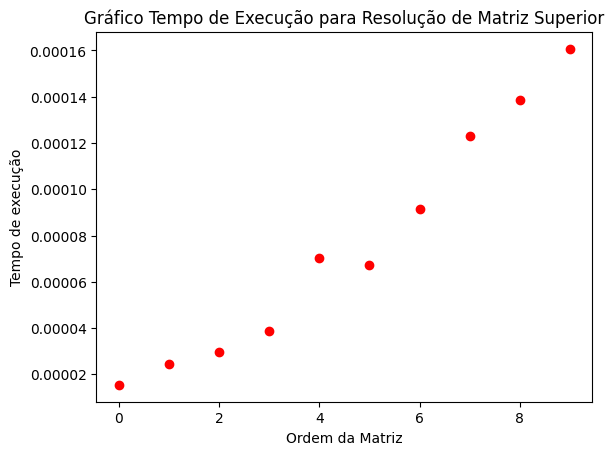

In [51]:
graf_pontos(tempo_inf)

*Plota o gráfico da função que intercepta o tempo de execução da função que resolve matriz triangular inferior:*

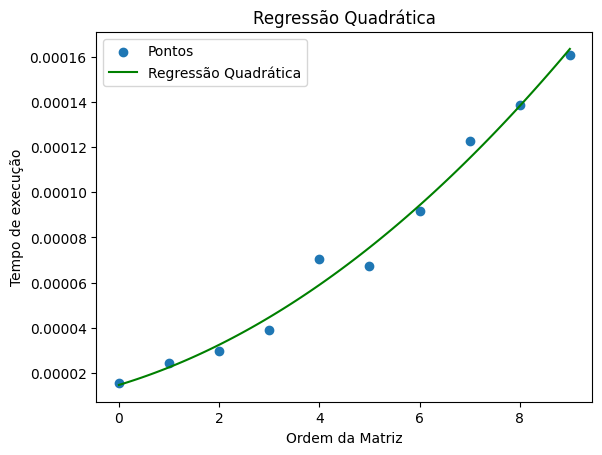

In [52]:
grafico(tempo_inf)

In [58]:

def convert_dict_to_vector(dic):
    # Converte o dicionário em vetores
    aux = np.array(list(dic.values()))
    x, y = aux[:, 0], aux[:, 1]
    m = len(x)
    dom = np.linspace(np.min(x), np.max(x))

    A = np.zeros((m, 3))
    for i in range(m):
        A[i, 0] = 1
        A[i, 1] = aux[i, 0]
        A[i, 2] = aux[i, 0]**2

    # Define o vetor independente
    b = aux[:, 1]
    B = A.transpose() @ A
    c = A.transpose() @ b
    M = np.concatenate((B, c.reshape((3, 1))), axis=1)  # Matriz aumentada do sistema Bx=c
    alpha = np.linalg.solve(M[:, :-1], M[:, -1])

    ######################
    # Plotagem
    ######################
    fig, axs = plt.subplots(1, 1, figsize=(6, 6))

    ######################
    # Criação das filas
    ######################
    axs.set_title("Tempo de criação das listas")
    axs.set_xlabel("Tamanho da lista")
    axs.set_ylabel("Tempo (s)")

    axs.plot(aux[:, 0], aux[:, 1], 'ro', label="Testes")

    ### Regressão quadrática

    im = [alpha[0] + alpha[1] * t + alpha[2] * t * t for t in dom]
    plt.plot(dom, im, 'r', alpha=0.5, label="Regressão quadrática")

    axs.legend(loc='upper left')

    plt.show()

convert_dict_to_vector(tempo_sup)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed